## PHY 266 HW 1

### First import all the necessary packages and functions for all the problems.

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.modeling import models
from scipy.stats import binom 

## Prb 1. CDF and PDF

### 1 a) Here we define a function which calculates and plots the empirical cumulative distribution function (ECDF) for the input data.

In [2]:
def ECDF(data, label=None):
    """
    This function calculates and plots the empirical cumulative
    distribution function (ECDF) for the input data.
    """

    sorteddata = np.sort(data)
    fractiongrid = np.linspace(0,1,len(data)+1)
    if label is None:
        plt.step(sorteddata, fractiongrid[1:], where='post')
    else:
        plt.step(sorteddata, fractiongrid[1:], where='post', label=label)
        plt.legend()
    plt.ylim(0, 1)
    plt.xlabel('data values', fontdict={'fontsize':14})
    plt.ylabel('Empirical CDF', fontdict={'fontsize':14})
    plt.grid(True, which='both')
    #plt.show()

### 1 b) Histogram and CDF of 500 samples drawn from N(0,1)

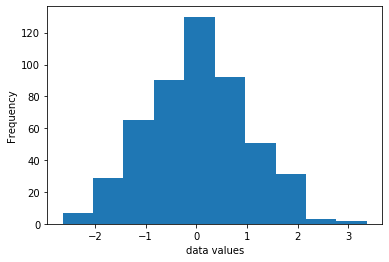

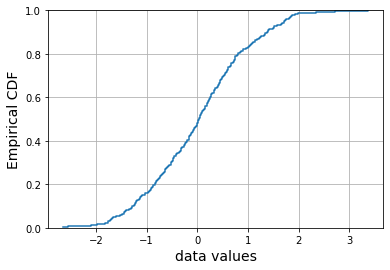

In [3]:
samples_n = np.random.normal(size=500)
plt.hist(samples_n)
plt.xlabel('data values')
plt.ylabel('Frequency')
plt.figure()
ECDF(samples_n)

### 1 c)  Histogram and CDF for 500 samples from t-distribution and overlayed on top of the histogram and CDF from 1 (b). Here we have used same number of bins for both histogram. It seems the CDF plot would be more helpful to dectet the difference between the two distributions.

In [4]:
samples_t = np.random.standard_t(5, size=500)

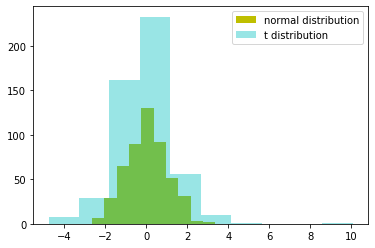

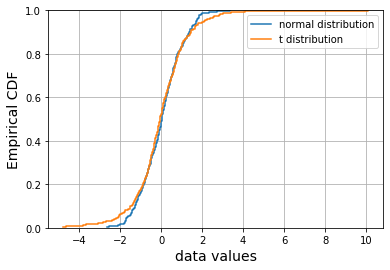

In [5]:
plt.hist(samples_n, bins=10, color='y', label='normal distribution')  #, alpha=0.4)
plt.hist(samples_t, bins=10, color='c', label='t distribution', alpha=0.4)
plt.legend()
plt.figure()
ECDF(samples_n, label='normal distribution')
ECDF(samples_t, label='t distribution')

### 1 d) The t-distribution covers bigger range than the normal distribution. So the t-distribution has longer tails and bins have bigger widths. Besides as they have same number of bins and these bins have to cover a bigger range for the t-distribution, then there are less bins in the central region for the t-distribution compared to the normal distribution. Most samples for both distribution are accumulated in the central region. As a result the central bins of the t-distribution have more samples in them than the normal distribution ones giving them higher heights. Combining these two effects it seems t-distribution has bigger area than the normal distribution.

### If we draw their probability density so that each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))) then we can see that they have the same areas.

<Figure size 432x288 with 0 Axes>

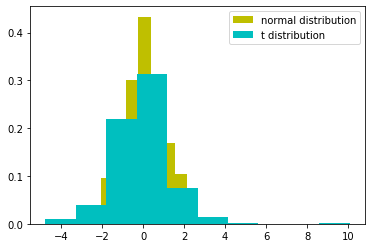

<Figure size 432x288 with 0 Axes>

In [6]:
plt.hist(samples_n, bins=10, color='y', label='normal distribution', density=True)#, alpha=0.4)
plt.hist(samples_t, bins=10, color='c', label='t distribution', density=True)#, alpha=0.4)
plt.legend()
plt.figure()

## Prb 2. Coin tossing wrapup

### 2 a) First I define two functions to calculate PMF and CDF for a binomial distribution. 

In [7]:
def binomial_PMF(n, p):
    """
    This function calculates a probability mass function(PMF)
    for a binomial distribution given the trial size and 
    probability.
    """
    k_values = np.arange(n + 1) 
 
    prb = [binom.pmf(k, n, p) for k in k_values ] 
    
    return prb

def binomial_CDF(n, p):
    """
    This function calculates a cumulative distribution function(CDF)
    for a binomial distribution given the trial size and 
    probability.
    """
    
    k_values = np.arange(n + 1) 
    sm = [binom.cdf(k, n, p) for k in k_values ] 
    
    return sm

### Here is the plot of the PMF for the fraction of heads with three different trial size.

Text(0.5, 1.0, 'Probability mass function')

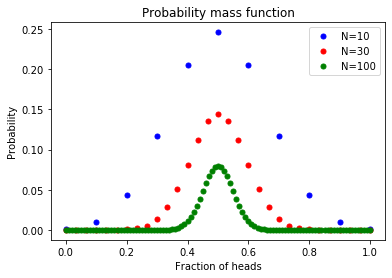

In [8]:
plt.plot(np.arange(11)/10, binomial_PMF(10, 0.5), '.b', markersize=10, label='N=10')
plt.plot(np.arange(31)/30, binomial_PMF(30, 0.5), '.r', markersize=10, label='N=30')
plt.plot(np.arange(101)/100, binomial_PMF(100, 0.5), '.g', markersize=10, label='N=100')
plt.legend()
plt.xlabel('Fraction of heads')
plt.ylabel('Probability')
plt.title('Probability mass function')

### 2 b) Here are the CDFs for the fraction of heads. We see the asymmetry because of  lower trial size. In case of a lower trial size slightly more samples can come from one side of the mean than the other. This asymmetry diminishes when trial size goes higher.  

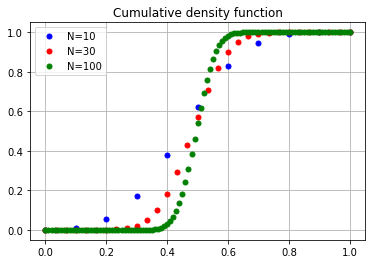

In [9]:
plt.plot(np.arange(11)/10, binomial_CDF(10, 0.5), '.b', markersize=10, label='N=10')
plt.plot(np.arange(31)/30, binomial_CDF(30, 0.5), '.r', markersize=10, label='N=30')
plt.plot(np.arange(101)/100, binomial_CDF(100, 0.5), '.g', markersize=10, label='N=100')
plt.legend()
plt.title('Cumulative density function')
plt.grid(True, which='both')

###  2 c) To find out out the p-value we have first plotted the PTE of the binomial distribution with N=100. From the plot I found that the p-value for having 63 heads is around 0.003. That means getting 63 heads is statistically unlikely.

<IPython.core.display.Javascript object>


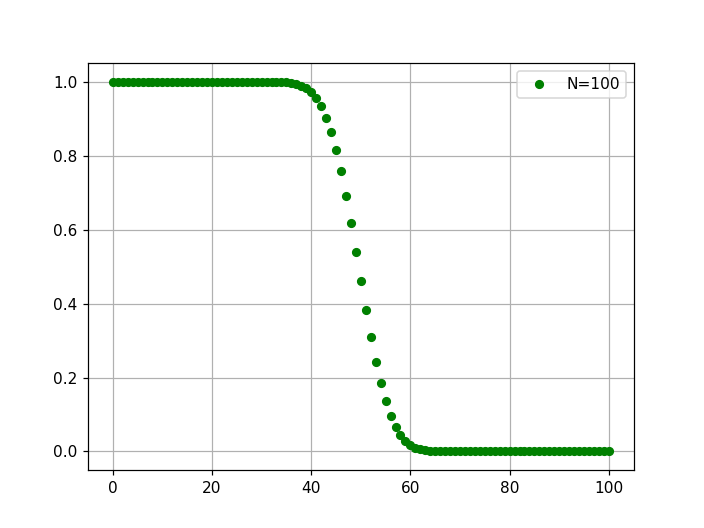

In [10]:
%matplotlib notebook
plt.plot(np.arange(101), 1 - np.array(binomial_CDF(100, 0.5)), '.g', markersize=10, label='N=100')
plt.legend()
plt.grid(True, which='both')

### We can also just calculate the probabilty of getting 63 heads from the PMF of the binomial distribution with N=100 and fair coin hypothesis and that will be it's p-value.

In [11]:
print('p-value for 63 Heads : %f' %binom.pmf(63, 100, 0.5))

p-value for 63 Heads : 0.002698


## Prb 3. Testing a distribution

### 3 a) The maximum difference between the empirical  CDF and model CDF helps us to quantify the maximum discrepancy between data and model. By looking at the PTE of the differences we can find out what is chance of having a discrepancy such as big or bigger.

### 3 b) Here I have developed the function to quantify the difference between the empirical CDF and model CDF.  

### As the CDF of the uniform distribution should be a line with some slope. We can calculate the slope if the uniform distribution ranges from 0-90.

In [12]:
uni_sample = np.random.uniform(0, 90, 20000)

slope = np.polyfit(np.sort(uni_sample), np.linspace(0,1,len(uni_sample)), deg=1)[0]
print('slope : %f' %slope)

slope : 0.011148


### Next I define two function to measure 'D'. I have measured D in two ways to check whether that affects p-value or not. As D I have calculated both the horizontal and vertical distances between the CDFs.

In [13]:
def cal_Dy(data):
    """
    This function calculates vertical distance between
    the empirical CDF of the given data and the CDF of
    uniform distribution.
    
    """
    sorteddata = np.sort(data)
    fractiongrid = np.linspace(0, 1,len(data)+1)
    D_y_value = abs(0.0111 * sorteddata - fractiongrid[1:])
    
    #print(sorteddata)
    #print(fractiongrid)
    #print(D_y_value)
    
    return D_y_value

def cal_Dx(data):
    """
    This function calculates vertical distance between
    the empirical CDF of the given data and the CDF of
    uniform distribution.
    
    """
    sorteddata = np.sort(data)
    fractiongrid = np.linspace(0, 1,len(data)+1)
    D_x_value = abs(sorteddata - fractiongrid[1:] /0.0111)
    
    #print(sorteddata)
    #print(fractiongrid)
    #print(D_x_value)
    
    return D_x_value

def PTE(data, label=None):
    """
    This function calculates and plots the complement of the 
    ECDF or probability to exceed (PTE) for the input data.
    """
    sorteddata = np.sort(data)
    fractiongrid = np.linspace(0,1,len(data)+1)
    if label is None:
        plt.step(sorteddata, 1 - fractiongrid[1:], where='post')
    else:
        plt.step(sorteddata, 1 - fractiongrid[1:], where='post', label=label)
        plt.legend()
    plt.ylim(0, 1)
    plt.xlabel('data values', fontdict={'fontsize':14})
    plt.ylabel('PTE', fontdict={'fontsize':14})
    plt.grid(True, which='both')

### 3 c) Here I calculated the p-value for the given data.

###  First load the given data. I have also drawn another sample of the same size as the given data for comparison.

In [14]:
cdata = np.loadtxt('../data/BCGsinMergers.txt')
PA_sample = np.random.uniform(0, 90, 38)
len(cdata)

38

### Just by looking at the CDFs of the given data, model and the other sample drawn from uniform distribution we can see the given data differs a lot compared to the drawn sample from the model. But let's check more.

<IPython.core.display.Javascript object>


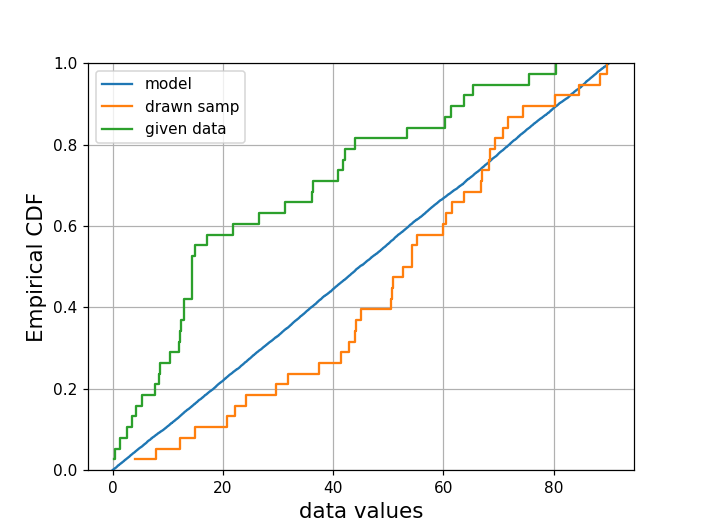

In [15]:
ECDF(uni_sample, label='model')
ECDF(PA_sample, label='drawn samp')
ECDF(cdata, label='given data')

### Here are the distances for the given data from the model and drawn sample.

In [16]:
Dy_PA = cal_Dy(PA_sample)
Dx_PA = cal_Dx(PA_sample)

D_y = cal_Dy(cdata)
D_x = cal_Dx(cdata)

print('\nVertical distances from the model for the given data : \n')
print(D_y)

print('\nHorizontal distances from the model for the given data : \n')
print(D_x)

print('\nMaximum vertical distance : %f' % np.max(D_y))
print('\nMaximum horizontal distance : %f' % np.max(D_x))


Vertical distances from the model for the given data : 

[0.02463206 0.0482583  0.06466108 0.07697379 0.09263241 0.11181191
 0.12515852 0.12511355 0.14291313 0.16836595 0.17336625 0.18239115
 0.20608872 0.23108506 0.25081131 0.27683804 0.28805517 0.31423398
 0.33996149 0.36607375 0.3878983  0.38835695 0.36312142 0.33698439
 0.31034506 0.28247575 0.30631886 0.28228945 0.30028391 0.32246142
 0.32781479 0.24891056 0.19926409 0.21275647 0.21468944 0.22171203
 0.13630343 0.10647425]

Horizontal distances from the model for the given data : 

[ 2.21910424  4.34759443  5.82532264  6.93457564  8.34526253 10.07314528
 11.27554209 11.27149095 12.87505635 15.16810321 15.61858136 16.43163486
 18.566551   20.81847343 22.59561312 24.94036363 25.9509159  28.30936725
 30.62716157 32.97961722 34.94579237 34.98711231 32.71364135 30.35895385
 27.95901429 25.44826564 27.59629385 25.43148239 27.05260481 29.05057806
 29.53286413 22.42437456 17.95171994 19.16724998 19.34139092 19.97405681
 12.27958833  9.59

### Next we have created  PTEs of  the maximum distances calculated for 1000 different samples with size=20 drawn from uniform distribution. The reason to choose a lower sample size than the given data is to check p-value. If I choose a bigger sample size than the range of maximum distances does not cover the maximum distance we have seen for the given data.

### The p-value for the maximum horizontal distance and vertical distance are around 0.002 and 0.001 repectively. So both matric suggests that the given data sample are statistically different than the uniform distribution.

In [17]:
max_Dy_dist = []
max_Dx_dist = []

for i in range(1000):
    samp = np.random.uniform(0, 90, 20)
    max_Dy_dist.append(np.max(cal_Dy(samp)))
    max_Dx_dist.append(np.max(cal_Dx(samp)))   

<IPython.core.display.Javascript object>


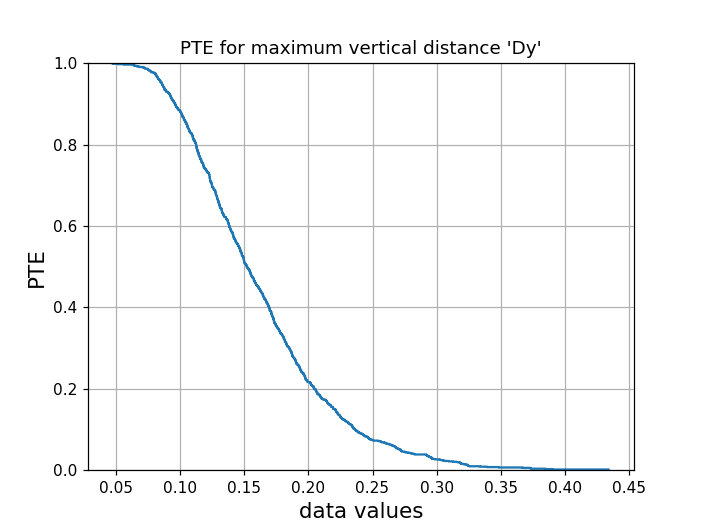

<IPython.core.display.Javascript object>


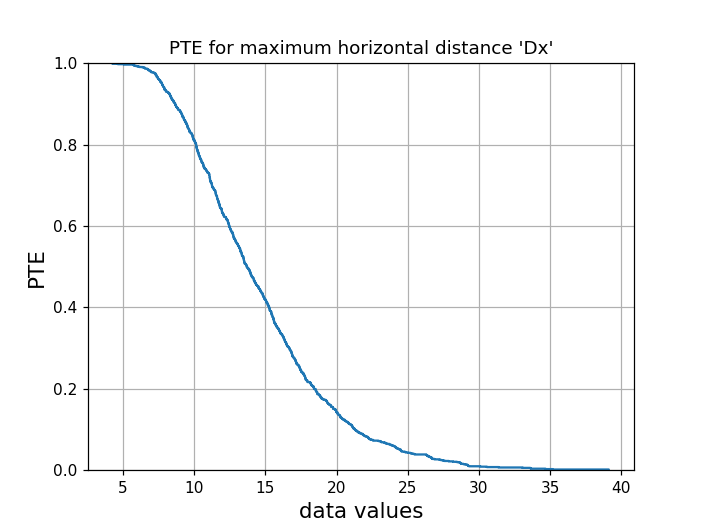

Text(0.5, 1.0, "PTE for maximum horizontal distance 'Dx'")

In [19]:
PTE(np.array(max_Dy_dist))
plt.title("PTE for maximum vertical distance 'Dy'")
plt.figure()
PTE(np.array(max_Dx_dist))
plt.title("PTE for maximum horizontal distance 'Dx'")

## Prb 4. A first look at images

## 4 a) Load and trim the data asrequired.

In [20]:
image = fits.open('../data/dlsmake.fits')

In [21]:
imdata = image[0].data[:100, :100]
print(imdata.shape)

(100, 100)


### 4 b)  Cut a area which is blank or no photometric source in it.

In [22]:
blk_area = image[0].data[3900:4055, 4281:4305]

### 4 c) Histogram of  the data  from the blank area.

<IPython.core.display.Javascript object>


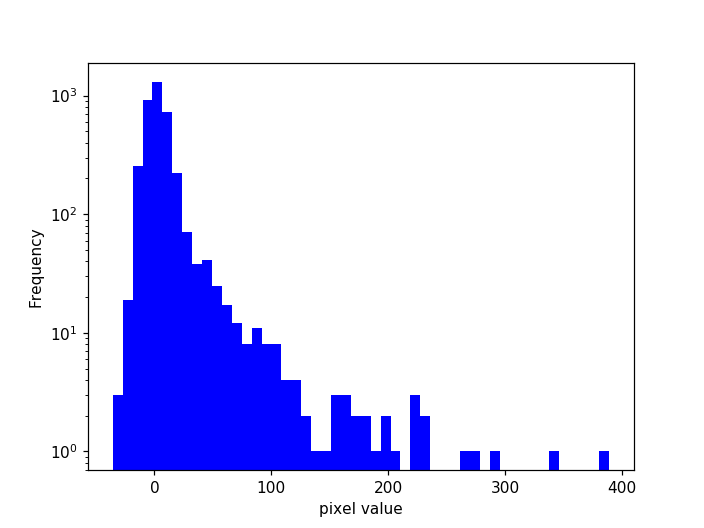

Text(0, 0.5, 'Frequency')

In [24]:
flat_dt = blk_area.flatten()
count, bins, ignored = plt.hist(flat_dt, bins=50, color='b', log=True)
plt.xlabel('pixel value')
plt.ylabel("Frequency")
#plt.figure()

### 4 d) Gaussian curve on top the histogram

In [25]:
gauss = models.Gaussian1D(amplitude=1200, mean=0, stddev=7)
print(gauss)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude mean stddev
    --------- ---- ------
       1200.0  0.0    7.0


<IPython.core.display.Javascript object>


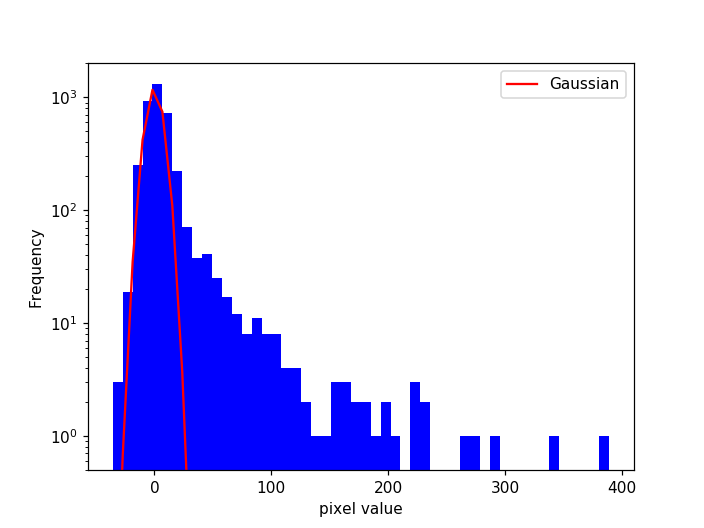

(0.5, 2000)

In [26]:
plt.hist(flat_dt, bins=50, color='b', log=True)
plt.plot(bins, gauss(bins), color='r', label='Gaussian')
plt.xlabel('pixel value')
plt.ylabel("Frequency")
plt.legend()
plt.ylim(5*10**-1, 2*10**3)

### 4 e) The blank areas are in the image recives the microwave background radiation which is a blackbody curve and the histogram depicts that.

### 4 f) I guess there is an galaxy type object at RA=139.6741341 and DEC = 30.8974406. I seached at SDSS and found that there is actually a galaxy with name 'J091841.80+305350.5' at redshift =0.025.